Mateusz Zacharecki, 313549

# Code

In [171]:
from sklearn.datasets import fetch_openml
import pandas as pd
import random
import numpy as np
from sklearn.metrics import balanced_accuracy_score
from sklearn.datasets import make_classification
from numpy.linalg import inv
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Data

In [283]:
X1, y1 = fetch_openml("sa-heart", return_X_y = True, version = 1)
X2, y2 = fetch_openml("fertility", return_X_y = True, version = 1)
X3, y3 = fetch_openml("heart-statlog", return_X_y = True, version = 1)

In [284]:
X1

,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,160.0,12.00,5.73,23.11,1,49.0,25.30,97.20,52.0
1,144.0,0.01,4.41,28.61,2,55.0,28.87,2.06,63.0
2,118.0,0.08,3.48,32.28,1,52.0,29.14,3.81,46.0
3,170.0,7.50,6.41,38.03,1,51.0,31.99,24.26,58.0
4,134.0,13.60,3.50,27.78,1,60.0,25.99,57.34,49.0
...,...,...,...,...,...,...,...,...,...
457,214.0,0.40,5.98,31.72,2,64.0,28.45,0.00,58.0
458,182.0,4.20,4.41,32.10,2,52.0,28.61,18.72,52.0
459,108.0,3.00,1.59,15.23,2,40.0,20.09,26.64,55.0
460,118.0,5.40,11.61,30.79,2,64.0,27.35,23.97,40.0


In [285]:
X2

,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,-0.33,0.69,0.0,1.0,1.0,0.0,0.8,0.0,0.88
1,-0.33,0.94,1.0,0.0,1.0,0.0,0.8,1.0,0.31
2,-0.33,0.50,1.0,0.0,0.0,0.0,1.0,-1.0,0.50
3,-0.33,0.75,0.0,1.0,1.0,0.0,1.0,-1.0,0.38
4,-0.33,0.67,1.0,1.0,0.0,0.0,0.8,-1.0,0.50
...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1.0,0.0,0.0,0.0,1.0,-1.0,0.50
96,-1.00,0.61,1.0,0.0,0.0,0.0,0.8,0.0,0.50
97,-1.00,0.67,1.0,1.0,1.0,0.0,1.0,-1.0,0.31
98,-1.00,0.64,1.0,0.0,1.0,0.0,1.0,0.0,0.19


In [286]:
X3

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0
266,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0
267,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0
268,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0


In [287]:
y1

0      2
1      2
2      1
3      2
4      2
      ..
457    1
458    2
459    1
460    1
461    2
Name: Class, Length: 462, dtype: category
Categories (2, object): ['1', '2']

In [288]:
y2

0     1
1     2
2     1
3     1
4     2
     ..
95    1
96    1
97    1
98    1
99    1
Name: Class, Length: 100, dtype: category
Categories (2, object): ['1', '2']

In [289]:
y3

0      present
1       absent
2      present
3       absent
4       absent
        ...   
265     absent
266     absent
267     absent
268     absent
269    present
Name: class, Length: 270, dtype: category
Categories (2, object): ['absent', 'present']

### Preparing expected data types

In [290]:
y1 = y1.replace('2', '0')
y2 = y2.replace('2', '0')
y3 = y3.replace('absent', '0')
y3 = y3.replace('present', '1')

In [291]:
y1 = y1.astype(float)
y2 = y2.astype(float)
y3 = y3.astype(float)

### Missing data

In [292]:
X1.isnull().any()

V1    False
V2    False
V3    False
V4    False
V5    False
V6    False
V7    False
V8    False
V9    False
dtype: bool

In [293]:
X2.isnull().any()

V1    False
V2    False
V3    False
V4    False
V5    False
V6    False
V7    False
V8    False
V9    False
dtype: bool

In [294]:
X3.isnull().any()

age                                     False
sex                                     False
chest                                   False
resting_blood_pressure                  False
serum_cholestoral                       False
fasting_blood_sugar                     False
resting_electrocardiographic_results    False
maximum_heart_rate_achieved             False
exercise_induced_angina                 False
oldpeak                                 False
slope                                   False
number_of_major_vessels                 False
thal                                    False
dtype: bool

### Collinear/correlated variables

In [295]:
X1.corr(method="spearman").style.background_gradient(cmap='coolwarm')

,V1,V2,V3,V4,V6,V7,V8,V9
V1,1.000000,0.221805,0.189325,0.359913,-0.045463,0.279136,0.181370,0.380563
V2,0.221805,1.000000,0.274268,0.324728,0.002724,0.173383,0.296340,0.498695
V3,0.189325,0.274268,1.000000,0.483382,0.059430,0.413730,-0.008973,0.336414
V4,0.359913,0.324728,0.483382,1.000000,-0.048214,0.771822,0.116516,0.590146
V6,-0.045463,0.002724,0.059430,-0.048214,1.000000,0.065374,0.010951,-0.111878
V7,0.279136,0.173383,0.413730,0.771822,0.065374,1.000000,0.123892,0.302850
V8,0.181370,0.296340,-0.008973,0.116516,0.010951,0.123892,1.000000,0.103579
V9,0.380563,0.498695,0.336414,0.590146,-0.111878,0.302850,0.103579,1.000000


In [296]:
X2.corr(method="spearman").style.background_gradient(cmap='coolwarm')

,V1,V2,V3,V4,V5,V6,V7,V8,V9
V1,1.000000,0.124241,-0.169069,-0.057825,-0.003657,-0.263558,-0.015978,-0.030730,-0.024867
V2,0.124241,1.000000,0.045506,0.218618,0.300922,0.065273,-0.161435,0.057899,-0.491852
V3,-0.169069,0.045506,1.000000,0.162936,-0.140972,0.082737,0.057983,0.076443,-0.096035
V4,-0.057825,0.218618,0.162936,1.000000,0.103166,-0.079786,-0.234207,0.111368,-0.048534
V5,-0.003657,0.300922,-0.140972,0.103166,1.000000,-0.244176,-0.069100,-0.056066,-0.211631
V6,-0.263558,0.065273,0.082737,-0.079786,-0.244176,1.000000,-0.000245,-0.006796,-0.127957
V7,-0.015978,-0.161435,0.057983,-0.234207,-0.069100,-0.000245,1.000000,-0.240734,0.130384
V8,-0.030730,0.057899,0.076443,0.111368,-0.056066,-0.006796,-0.240734,1.000000,-0.092990
V9,-0.024867,-0.491852,-0.096035,-0.048534,-0.211631,-0.127957,0.130384,-0.092990,1.000000


In [297]:
X3.corr(method="spearman").style.background_gradient(cmap='coolwarm')

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal
age,1.000000,-0.098542,0.120597,0.276844,0.211059,0.117920,0.128298,-0.399880,0.094830,0.257712,0.174111,0.374962,0.108891
sex,-0.098542,1.000000,0.066653,-0.054963,-0.158326,0.042140,0.039491,-0.076223,0.180022,0.111564,0.051063,0.103746,0.382306
chest,0.120597,0.066653,1.000000,-0.001953,0.100225,-0.107783,0.110092,-0.349173,0.401879,0.211559,0.192331,0.250993,0.304878
resting_blood_pressure,0.276844,-0.054963,-0.001953,1.000000,0.190482,0.133742,0.116558,-0.042943,0.070456,0.182700,0.107484,0.058231,0.107421
serum_cholestoral,0.211059,-0.158326,0.100225,0.190482,1.000000,0.032506,0.163601,-0.056473,0.104276,0.013844,-0.000694,0.154671,0.019726
fasting_blood_sugar,0.117920,0.042140,-0.107783,0.133742,0.032506,1.000000,0.053567,0.014583,-0.004107,-0.008769,0.020992,0.115877,0.046360
resting_electrocardiographic_results,0.128298,0.039491,0.110092,0.116558,0.163601,0.053567,1.000000,-0.115033,0.095038,0.110352,0.161585,0.110935,0.005381
maximum_heart_rate_achieved,-0.399880,-0.076223,-0.349173,-0.042943,-0.056473,0.014583,-0.115033,1.000000,-0.394153,-0.423185,-0.427491,-0.290284,-0.269459
exercise_induced_angina,0.094830,0.180022,0.401879,0.070456,0.104276,-0.004107,0.095038,-0.394153,1.000000,0.276431,0.271273,0.186474,0.320636
oldpeak,0.257712,0.111564,0.211559,0.182700,0.013844,-0.008769,0.110352,-0.423185,0.276431,1.000000,0.625263,0.241518,0.339188


### Preparing final data

In [298]:
X1 = X1.drop(['V4'], axis=1)

In [299]:
X1 = pd.get_dummies(X1)

In [300]:
X1 = X1.drop(['V5_2'], axis=1)

In [301]:
scaler = StandardScaler() 
X1.iloc[:,:-1] = pd.DataFrame(scaler.fit_transform(X1.iloc[:,:-1]))

In [302]:
scaler = StandardScaler() 
X2 = pd.DataFrame(scaler.fit_transform(X2))

In [303]:
scaler = StandardScaler() 
X3 = pd.DataFrame(scaler.fit_transform(X3))

## Implementation of algorithms of optimalization

In [218]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [604]:
def cross_entropy_loss(y_true, y_pred, clip_val = 1e-10):
    y_pred = np.clip(y_pred, clip_val, 1 -clip_val)
    loss = np.multiply(y_true, np.log(y_pred)) + np.multiply(1 - y_true, np.log(1 - y_pred))
    total_loss = -np.sum(loss, axis = 0)
    return total_loss

In [220]:
def transform_X(X):
    X = np.array(X)
    X = np.insert(X, 0, np.ones((X.shape[0])), axis = 1)
    return X   

In [221]:
def transform_y(y):
    y = np.array(y)
    y = y.reshape((y.shape[0], -1))
    return y

### Gradient descent

In [605]:
def gradient_descent(X, y, l_rate = 0.01, epoch = 500):

    X = transform_X(X)
    y = transform_y(y)

    # start vector for betas
    betas = np.zeros((X.shape[1],1))

    # vector for losses
    losses = []

    for e in range(epoch):
        y_hat = sigmoid(np.matmul(X, betas))
        grad = np.matmul(X.T, (y_hat-y))
        grad = grad/X.shape[0]
        betas = betas - l_rate * grad
        loss = cross_entropy_loss(y, sigmoid(np.matmul(X, betas)))
        losses.append(loss)

        # checking convergence
        if np.linalg.norm(grad) < 0.0001:
            break

    coef = betas[1:]
    intercept = betas[0]

    return coef, intercept, losses

### Stochastic gradient descent

In [606]:
def stochastic_gradient_descent(X, y, l_rate = 0.01, epoch = 500):

    X = transform_X(X)
    y = transform_y(y)

    # start vector for betas
    betas = np.zeros((X.shape[0],1))

    # vector for losses
    losses = []

    Xy = np.c_[X,y]

    for e in range(epoch):
        # randomizing batch split
        np.random.shuffle(Xy)
        for i in range(X.shape[0]):
            X_batch, y_batch = Xy[i:(i+1), :-1], Xy[i:(i+1), -1:]
            y_hat = sigmoid(np.matmul(X_batch, betas))
            grad = np.matmul(X_batch.T, (y_hat-y_batch))
            betas = betas - l_rate * grad

        loss = cross_entropy_loss(y, sigmoid(np.matmul(X, betas)))
        losses.append(loss)

        # checking convergence
        if np.linalg.norm(grad) < 0.0001:
            break

    coef = betas[1:]
    intercept = betas[0]
    losses = losses

    return coef, intercept, losses

### Stochastic gradient descent minibatch

In [607]:
def stochastic_gradient_descent_minibatch(X, y, l_rate = 0.01, batch_size = 20, epoch = 500):

    X = transform_X(X)
    y = transform_y(y)
    
    # start vector for betas
    betas = np.zeros((X.shape[0],1))

    # vector for losses
    losses = []

    Xy = np.c_[X,y]
    for e in range(epoch):
        #randomizing batch split
        np.random.shuffle(Xy)
        for i in range(0, X.shape[0], batch_size):
            X_batch, y_batch = Xy[i:(i+batch_size), :-1], Xy[i:(i+batch_size), -1:]
            y_hat = sigmoid(np.matmul(X_batch, betas))
            grad = np.matmul(X_batch.T, (y_hat-y_batch))
            betas = betas - l_rate * grad

        loss = cross_entropy_loss(y, sigmoid(np.matmul(X, betas)))
        losses.append(loss)

        # checking convergence
        if np.linalg.norm(grad) < 0.0001:
            break

    coef = betas[1:]
    intercept = betas[0]
    
    return coef, intercept, losses

### Iterative reweighted least squares

In [608]:
def iterative_reweighted_least_squares(X, y, epoch = 500):

    X = transform_X(X)
    y = transform_y(y)

    # start vector for betas
    betas = np.zeros((X.shape[0],1))

    # vector for losses
    losses = []

    for e in range(epoch):
        y_hat = sigmoid(np.matmul(X, betas))
        W = np.diag(np.ravel(y_hat*(1-y_hat)))
        grad = np.matmul(X.T, (y_hat-y))
        hessian = np.matmul(np.matmul(X.T, W), X) + 0.001*np.eye(P)
        betas -= np.matmul(inv(hessian), grad)
        loss = cross_entropy_loss(y, sigmoid(np.matmul(X, betas)))
        losses.append(loss)

        # checking convergence
        if np.linalg.norm(grad) < 0.0001:
            break

    coef = betas[1:]
    intercept = betas[0]
    
    return coef, intercept, losses

### Algorithms - classes

In [609]:
class gradient_descent:
    def __init__(self):
        pass
    
    def fit(self, X, y):
        self.X = self.transform_X(X)
        self.y = self.transform_y(y)
        self.N,self.P = self.X.shape
        self.optimize()
        
    def optimize(self, l_rate = 0.01, epoch = 500):

        # start vector for betas
        betas = np.zeros((self.P,1))

        # vector for losses
        losses = []

        for e in range(epoch):
            y_hat = self.sigmoid(np.matmul(self.X, betas))
            grad = np.matmul(self.X.T, (y_hat-self.y))
            grad = grad/self.X.shape[0]
            betas = betas - l_rate * grad
            loss = self.cross_entropy_loss(self.y, self.sigmoid(np.matmul(self.X, betas)))
            losses.append(loss)
            
            # checking convergence
            if np.linalg.norm(grad) < 0.0001:
                break

        self.coef = betas[1:]
        self.intercept = betas[0]
        self.losses = losses
            
    def predict(self, X, thres=0.5):
        X = np.array(X)
        y_pred= self.sigmoid(np.matmul(X,self.coef) + self.intercept)
        return np.where(y_pred > thres, 1, 0)
        
    def predict_proba(self, X):
        X = np.array(X)
        return self.sigmoid(np.matmul(X,self.coef) + self.intercept)
    
    def transform_X(self, X):
        X = np.array(X)
        X = np.insert(X, 0, np.ones((X.shape[0])), axis = 1)
        return X
    
    def transform_y(self, y):
        y = np.array(y)
        y = y.reshape((y.shape[0], -1))
        return y

    def cross_entropy_loss(self, y_true, y_pred, clip_val = 1e-10):
        y_pred = np.clip(y_pred, clip_val, 1 -clip_val)
        loss = np.multiply(y_true, np.log(y_pred)) + np.multiply(1 - y_true, np.log(1 - y_pred))
        total_loss = -np.sum(loss, axis = 0)
        return total_loss

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

In [610]:
class stochastic_gradient_descent:
    def __init__(self):
        pass
    
    def fit(self, X, y):
        self.X = self.transform_X(X)
        self.y = self.transform_y(y)
        self.N,self.P = self.X.shape
        self.optimize()
        
    def optimize(self, l_rate = 0.01, epoch = 500):

        # start vector for betas
        betas = np.zeros((self.P,1))
        
        # vector for losses
        losses = []
        
        Xy = np.c_[self.X,self.y]

        for e in range(epoch):
            # randomizing batch split
            np.random.shuffle(Xy)
            for i in range(self.X.shape[0]):
                X_batch, y_batch = Xy[i:(i+1), :-1], Xy[i:(i+1), -1:]
                y_hat = self.sigmoid(np.matmul(X_batch, betas))
                grad = np.matmul(X_batch.T, (y_hat-y_batch))
                betas = betas - l_rate * grad

            loss = self.cross_entropy_loss(self.y, self.sigmoid(np.matmul(self.X, betas)))
            losses.append(loss)
            
            # checking convergence
            if np.linalg.norm(grad) < 0.0001:
                break

        self.coef = betas[1:]
        self.intercept = betas[0]
        self.losses = losses
    
    def predict(self, X, thres=0.5):
        X = np.array(X)
        y_pred= self.sigmoid(np.matmul(X,self.coef) + self.intercept)
        return np.where(y_pred > thres, 1, 0)
        
    def predict_proba(self, X):
        X = np.array(X)
        return self.sigmoid(np.matmul(X,self.coef) + self.intercept)
    
    def transform_X(self, X):
        X = np.array(X)
        X = np.insert(X, 0, np.ones((X.shape[0])), axis = 1)
        return X
    
    def transform_y(self, y):
        y = np.array(y)
        y = y.reshape((y.shape[0], -1))
        return y

    def cross_entropy_loss(self, y_true, y_pred, clip_val = 1e-10):
        y_pred = np.clip(y_pred, clip_val, 1 -clip_val)
        loss = np.multiply(y_true, np.log(y_pred)) + np.multiply(1 - y_true, np.log(1 - y_pred))
        total_loss = -np.sum(loss, axis = 0)
        return total_loss

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

In [611]:
class stochastic_gradient_descent_minibatch:
    def __init__(self):
        pass
    
    def fit(self, X, y):
        self.X = self.transform_X(X)
        self.y = self.transform_y(y)
        self.N,self.P = self.X.shape
        self.optimize()
        
    def optimize(self, l_rate = 0.01, batch_size = 20, epoch = 500):

        # start vector for betas
        betas = np.zeros((self.P,1))

        # vector for losses
        losses = []
        
        Xy = np.c_[self.X,self.y]
        for e in range(epoch):
            #randomizing batch split
            np.random.shuffle(Xy)
            for i in range(0, self.X.shape[0], batch_size):
                X_batch, y_batch = Xy[i:(i+batch_size), :-1], Xy[i:(i+batch_size), -1:]
                y_hat = self.sigmoid(np.matmul(X_batch, betas))
                grad = np.matmul(X_batch.T, (y_hat-y_batch))
                betas = betas - l_rate * grad

            loss = self.cross_entropy_loss(self.y, self.sigmoid(np.matmul(self.X, betas)))
            losses.append(loss)
            
            # checking convergence
            if np.linalg.norm(grad) < 0.0001:
                break

        self.coef = betas[1:]
        self.intercept = betas[0]
        self.losses = losses
    
    def predict(self, X, thres=0.5):
        X = np.array(X)
        y_pred= self.sigmoid(np.matmul(X,self.coef) + self.intercept)
        return np.where(y_pred > thres, 1, 0)
        
    def predict_proba(self, X):
        X = np.array(X)
        return self.sigmoid(np.matmul(X,self.coef) + self.intercept)
    
    def transform_X(self, X):
        X = np.array(X)
        X = np.insert(X, 0, np.ones((X.shape[0])), axis = 1)
        return X
    
    def transform_y(self, y):
        y = np.array(y)
        y = y.reshape((y.shape[0], -1))
        return y

    def cross_entropy_loss(self, y_true, y_pred, clip_val = 1e-10):
        y_pred = np.clip(y_pred, clip_val, 1 -clip_val)
        loss = np.multiply(y_true, np.log(y_pred)) + np.multiply(1 - y_true, np.log(1 - y_pred))
        total_loss = -np.sum(loss, axis = 0)
        return total_loss

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

In [612]:
class iterative_reweighted_least_squares:
    def __init__(self):
        pass
    
    def fit(self, X, y):
        self.X = self.transform_X(X)
        self.y = self.transform_y(y)
        self.N,self.P = self.X.shape
        self.optimize()
        
    def optimize(self, epoch = 500):

        # start vector for betas
        betas = np.zeros((self.P,1))

        # vector for losses
        losses = []
        
        for e in range(epoch):
            y_hat = self.sigmoid(np.matmul(self.X, betas))
            W = np.diag(np.ravel(y_hat*(1-y_hat)))
            grad = np.matmul(self.X.T, (y_hat-self.y))
            hessian = np.matmul(np.matmul(self.X.T, W), self.X) + 0.001*np.eye(self.P)
            betas -= np.matmul(inv(hessian), grad)
            loss = self.cross_entropy_loss(self.y, self.sigmoid(np.matmul(self.X, betas)))
            losses.append(loss)
            
            # checking convergence
            if np.linalg.norm(grad) < 0.0001:
                break

        self.coef = betas[1:]
        self.intercept = betas[0]
        self.losses = losses
        
    def predict(self, X, thres=0.5):
        X = np.array(X)
        y_pred= self.sigmoid(np.matmul(X,self.coef) + self.intercept)
        return np.where(y_pred > thres, 1, 0)
        
    def predict_proba(self, X):
        X = np.array(X)
        return self.sigmoid(np.matmul(X,self.coef) + self.intercept)
    
    def transform_X(self, X):
        X = np.array(X)
        X = np.insert(X, 0, np.ones((X.shape[0])), axis = 1)
        return X
    
    def transform_y(self, y):
        y = np.array(y)
        y = y.reshape((y.shape[0], -1))
        return y

    def cross_entropy_loss(self, y_true, y_pred, clip_val = 1e-10):
        y_pred = np.clip(y_pred, clip_val, 1 -clip_val)
        loss = np.multiply(y_true, np.log(y_pred)) + np.multiply(1 - y_true, np.log(1 - y_pred))
        total_loss = -np.sum(loss, axis = 0)
        return total_loss

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

## Analysis

In [613]:
# vector of mean balanced accuracies
meanBA = []

### Gradient Descent, X1

In [614]:
# vector of losses for different train-test splits
losses1 = []
# vector of balanced accuracies for different train-test splits
balanced_accuracy1 = []
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25, random_state=i)
    LR_model = gradient_descent()
    LR_model.fit(X_train,y_train)
    losses1.append(LR_model.losses)
    y_pred = LR_model.predict(X_test)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    balanced_accuracy1.append(balanced_accuracy)

In [615]:
balanced_accuracy1

[0.659007659007659,
 0.7032894736842106,
 0.601889338731444,
 0.6621621621621622,
 0.7006206644760862]

In [616]:
meanBA.append(np.round(np.mean(balanced_accuracy1), 4))

Text(0.5, 1.0, 'Loss function - gradient descent, X1, 0')

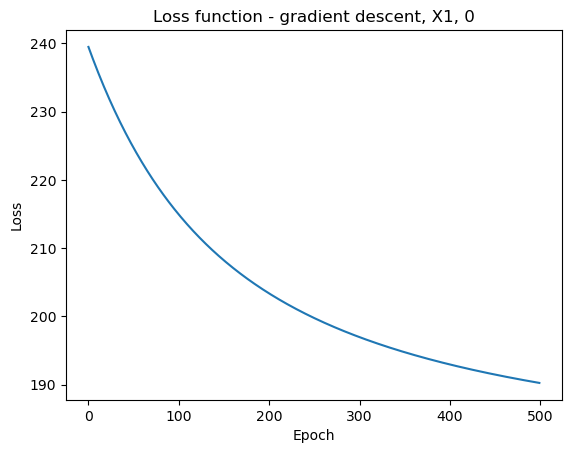

In [617]:
plt.plot(range(len(losses1[0])), losses1[0])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - gradient descent, X1, 0')

Text(0.5, 1.0, 'Loss function - gradient descent, X1, 1')

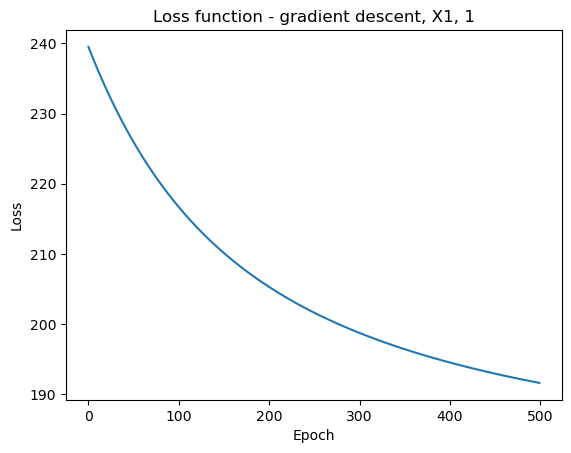

In [618]:
plt.plot(range(len(losses1[1])), losses1[1])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - gradient descent, X1, 1')

Text(0.5, 1.0, 'Loss function - gradient descent, X1, 2')

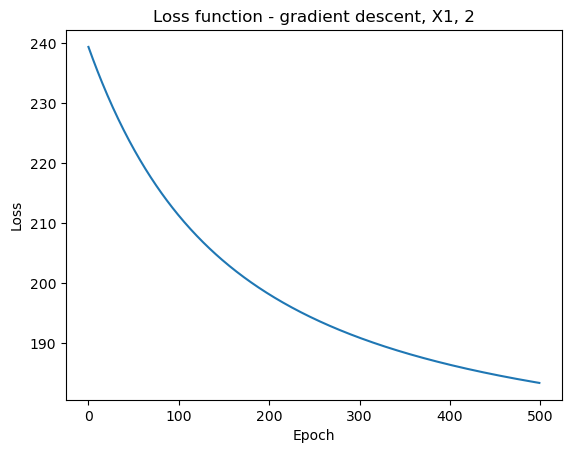

In [619]:
plt.plot(range(len(losses1[2])), losses1[2])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - gradient descent, X1, 2')

Text(0.5, 1.0, 'Loss function - gradient descent, X1, 3')

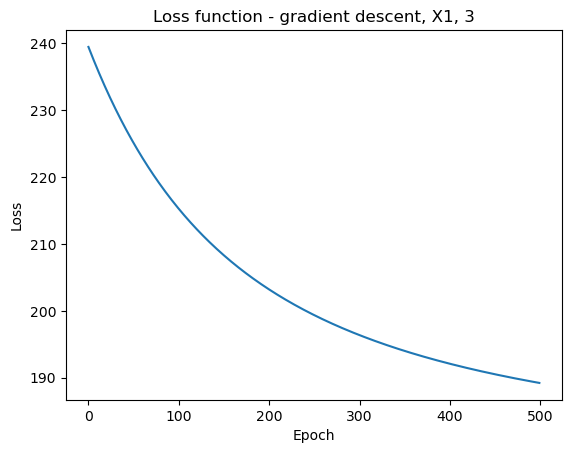

In [620]:
plt.plot(range(len(losses1[3])), losses1[3])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - gradient descent, X1, 3')

Text(0.5, 1.0, 'Loss function - gradient descent, X1, 4')

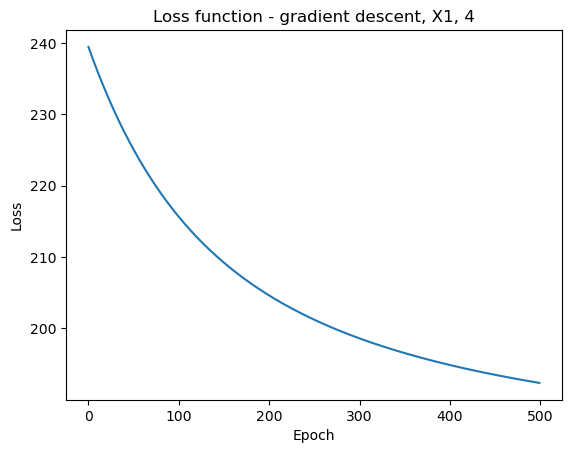

In [621]:
plt.plot(range(len(losses1[4])), losses1[4])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - gradient descent, X1, 4')

### Gradient Descent, X2

In [622]:
# vector of losses for different train-test splits
losses2 = []
# vector of balanced accuracies for different train-test splits
balanced_accuracy2 = []
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.25, random_state=i)
    LR_model = gradient_descent()
    LR_model.fit(X_train,y_train)
    losses2.append(LR_model.losses)
    y_pred = LR_model.predict(X_test)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    balanced_accuracy2.append(balanced_accuracy)

In [623]:
balanced_accuracy2

[0.5, 0.5, 0.47619047619047616, 0.5, 0.5]

In [624]:
meanBA.append(np.round(np.mean(balanced_accuracy2), 4))

Text(0.5, 1.0, 'Loss function - gradient descent, X2, 0')

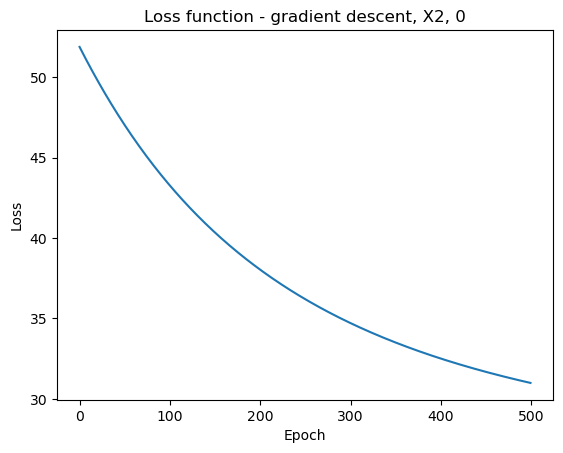

In [625]:
plt.plot(range(len(losses2[0])), losses2[0])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - gradient descent, X2, 0')

Text(0.5, 1.0, 'Loss function - gradient descent, X2, 1')

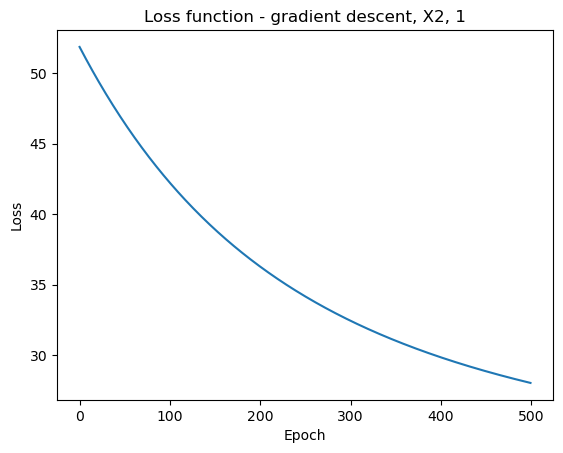

In [626]:
plt.plot(range(len(losses2[1])), losses2[1])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - gradient descent, X2, 1')

Text(0.5, 1.0, 'Loss function - gradient descent, X2, 2')

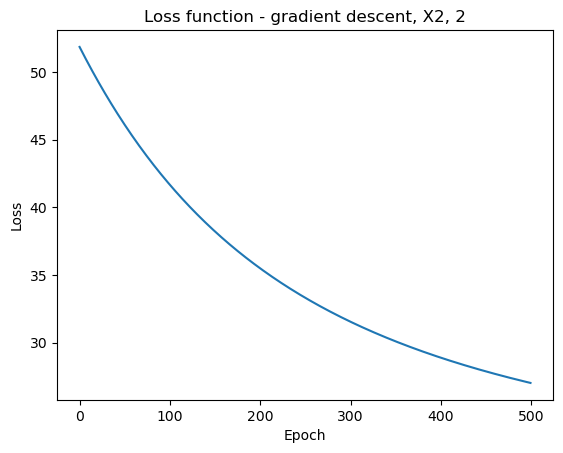

In [627]:
plt.plot(range(len(losses2[2])), losses2[2])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - gradient descent, X2, 2')

Text(0.5, 1.0, 'Loss function - gradient descent, X2, 3')

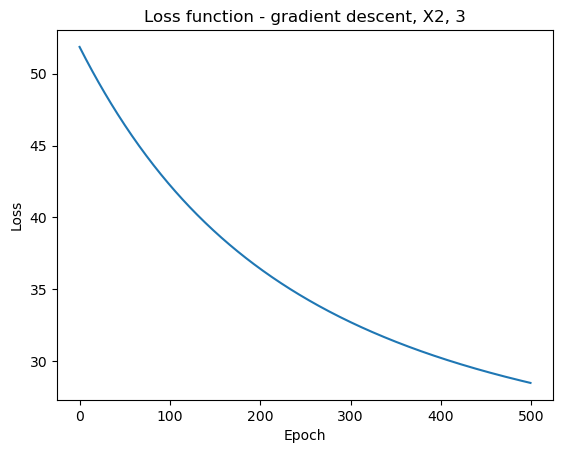

In [628]:
plt.plot(range(len(losses2[3])), losses2[3])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - gradient descent, X2, 3')

Text(0.5, 1.0, 'Loss function - gradient descent, X2, 4')

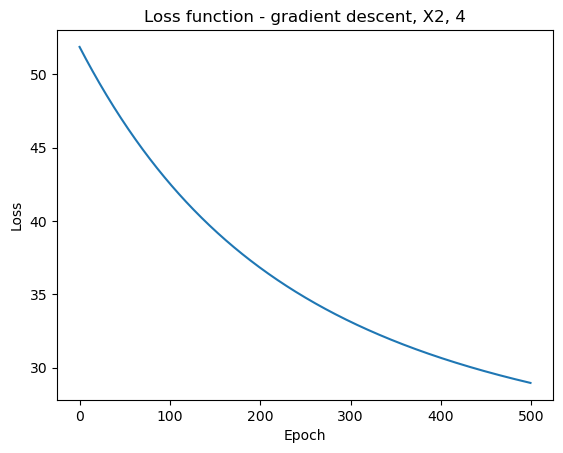

In [629]:
plt.plot(range(len(losses2[4])), losses2[4])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - gradient descent, X2, 4')

### Gradient Descent, X3

In [630]:
# vector of losses for different train-test splits
losses3 = []
# vector of balanced accuracies for different train-test splits
balanced_accuracy3 = []
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.25, random_state=i)
    LR_model = gradient_descent()
    LR_model.fit(X_train,y_train)
    losses3.append(LR_model.losses)
    y_pred = LR_model.predict(X_test)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    balanced_accuracy3.append(balanced_accuracy)

In [631]:
balanced_accuracy3

[0.7928571428571429,
 0.8350694444444444,
 0.8012820512820513,
 0.7928571428571429,
 0.7847222222222222]

In [632]:
meanBA.append(np.round(np.mean(balanced_accuracy3), 4))

Text(0.5, 1.0, 'Loss function - gradient descent, X3, 0')

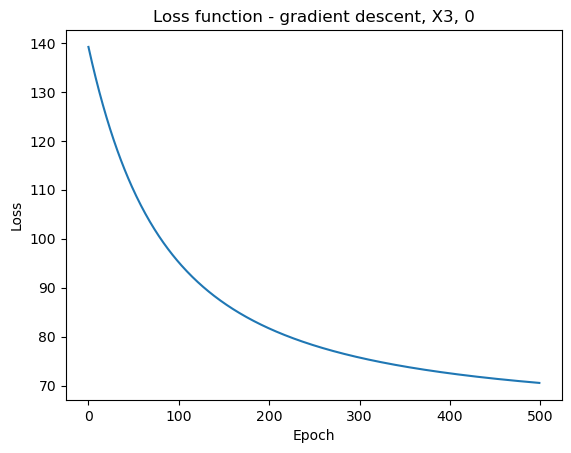

In [633]:
plt.plot(range(len(losses3[0])), losses3[0])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - gradient descent, X3, 0')

Text(0.5, 1.0, 'Loss function - gradient descent, X3, 1')

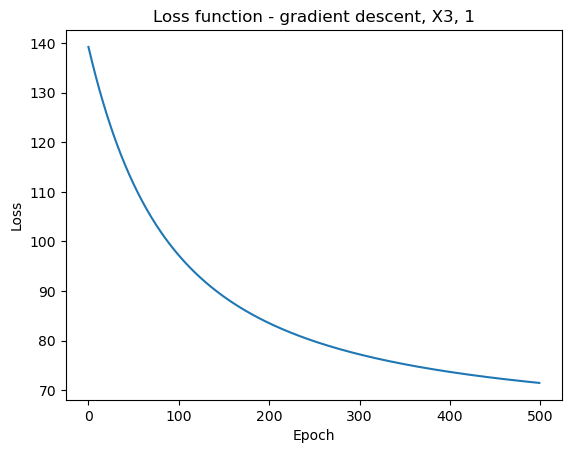

In [634]:
plt.plot(range(len(losses3[1])), losses3[1])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - gradient descent, X3, 1')

Text(0.5, 1.0, 'Loss function - gradient descent, X3, 2')

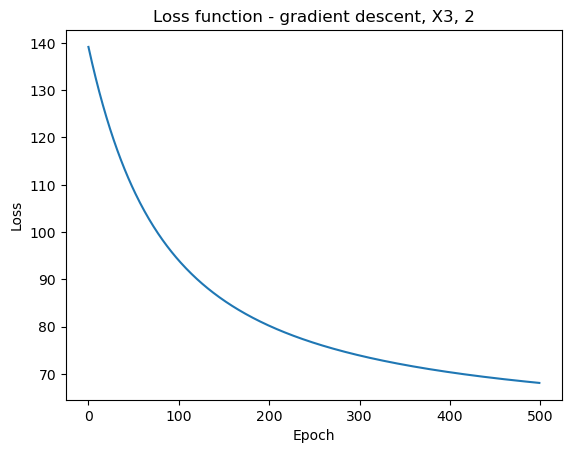

In [635]:
plt.plot(range(len(losses3[2])), losses3[2])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - gradient descent, X3, 2')

Text(0.5, 1.0, 'Loss function - gradient descent, X3, 3')

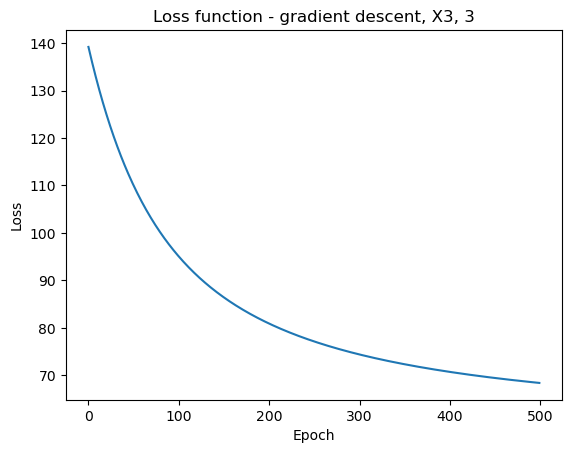

In [636]:
plt.plot(range(len(losses3[3])), losses3[3])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - gradient descent, X3, 3')

Text(0.5, 1.0, 'Loss function - gradient descent, X3, 4')

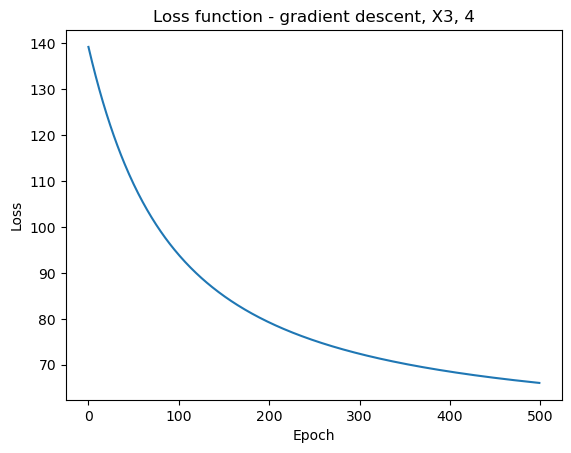

In [637]:
plt.plot(range(len(losses3[4])), losses3[4])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - gradient descent, X3, 4')

### Stochastic Gradient Descent, X1

In [638]:
# vector of losses for different train-test splits
losses4 = []
# vector of balanced accuracies for different train-test splits
balanced_accuracy4 = []
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25, random_state=i)
    LR_model = stochastic_gradient_descent()
    LR_model.fit(X_train,y_train)
    losses4.append(LR_model.losses)
    y_pred = LR_model.predict(X_test)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    balanced_accuracy4.append(balanced_accuracy)

In [639]:
balanced_accuracy4

[0.6914751914751914,
 0.6407894736842106,
 0.6481106612685561,
 0.7010939510939511,
 0.6611902154070829]

In [640]:
meanBA.append(np.round(np.mean(balanced_accuracy4), 4))

Text(0.5, 1.0, 'Loss function - stochastic gradient descent, X1, 0')

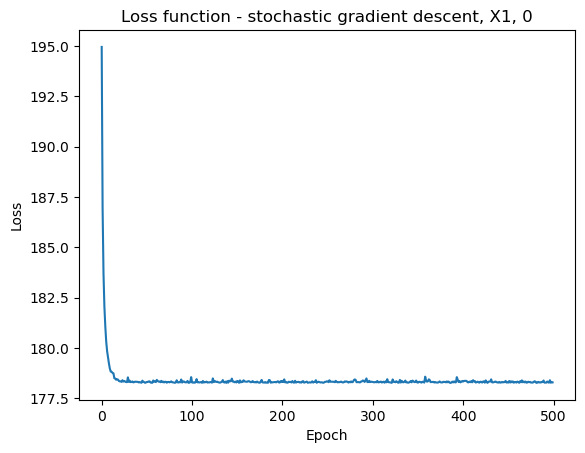

In [641]:
plt.plot(range(len(losses4[0])), losses4[0])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - stochastic gradient descent, X1, 0')

Text(0.5, 1.0, 'Loss function - stochastic gradient descent, X1, 1')

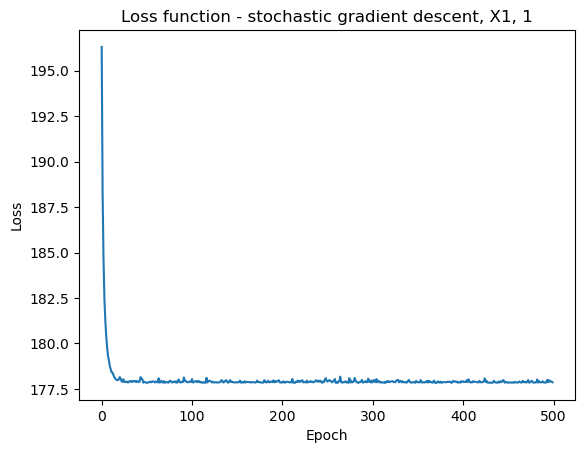

In [642]:
plt.plot(range(len(losses4[1])), losses4[1])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - stochastic gradient descent, X1, 1')

Text(0.5, 1.0, 'Loss function - stochastic gradient descent, X1, 2')

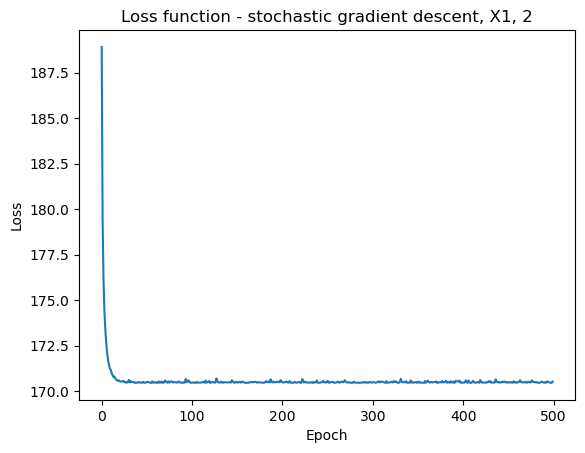

In [643]:
plt.plot(range(len(losses4[2])), losses4[2])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - stochastic gradient descent, X1, 2')

Text(0.5, 1.0, 'Loss function - stochastic gradient descent, X1, 3')

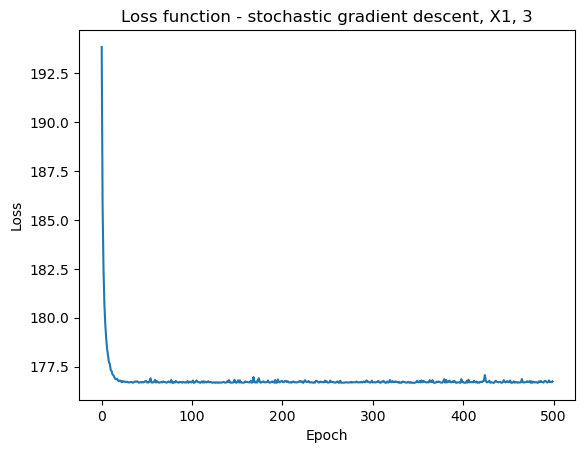

In [644]:
plt.plot(range(len(losses4[3])), losses4[3])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - stochastic gradient descent, X1, 3')

Text(0.5, 1.0, 'Loss function - stochastic gradient descent, X1, 4')

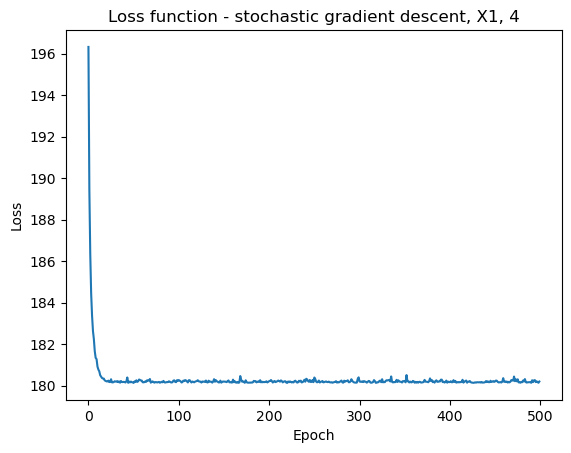

In [645]:
plt.plot(range(len(losses4[4])), losses4[4])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - stochastic gradient descent, X1, 4')

### Stochastic Gradient Descent, X2

In [646]:
# vector of losses for different train-test splits
losses5 = []
# vector of balanced accuracies for different train-test splits
balanced_accuracy5 = []
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.25, random_state=i)
    LR_model = stochastic_gradient_descent()
    LR_model.fit(X_train,y_train)
    losses5.append(LR_model.losses)
    y_pred = LR_model.predict(X_test)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    balanced_accuracy5.append(balanced_accuracy)

In [647]:
balanced_accuracy5

[0.5, 0.5, 0.7023809523809523, 0.5, 0.4772727272727273]

In [648]:
meanBA.append(np.round(np.mean(balanced_accuracy5), 4))

Text(0.5, 1.0, 'Loss function - stochastic gradient descent, X2, 0')

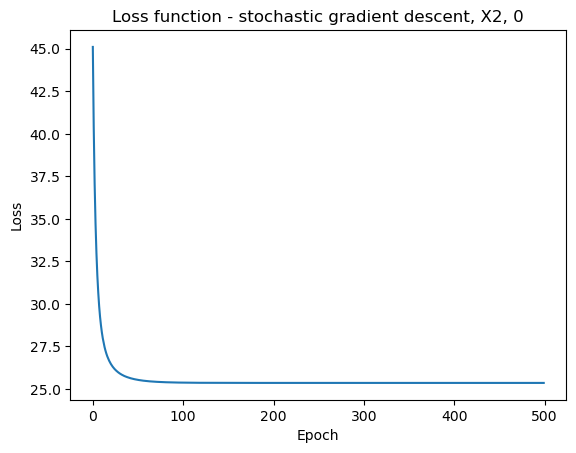

In [649]:
plt.plot(range(len(losses5[0])), losses5[0])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - stochastic gradient descent, X2, 0')

Text(0.5, 1.0, 'Loss function - stochastic gradient descent, X2, 1')

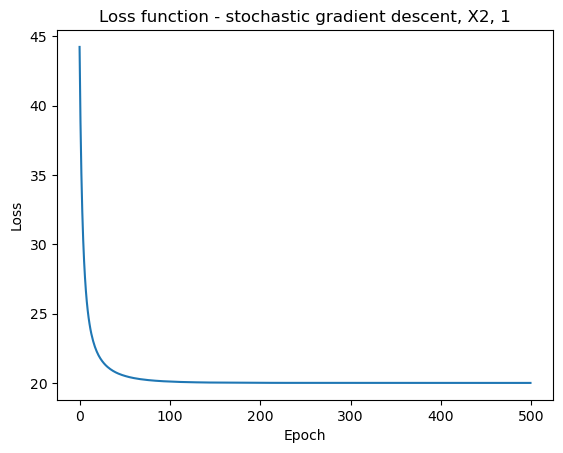

In [650]:
plt.plot(range(len(losses5[1])), losses5[1])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - stochastic gradient descent, X2, 1')

Text(0.5, 1.0, 'Loss function - stochastic gradient descent, X2, 2')

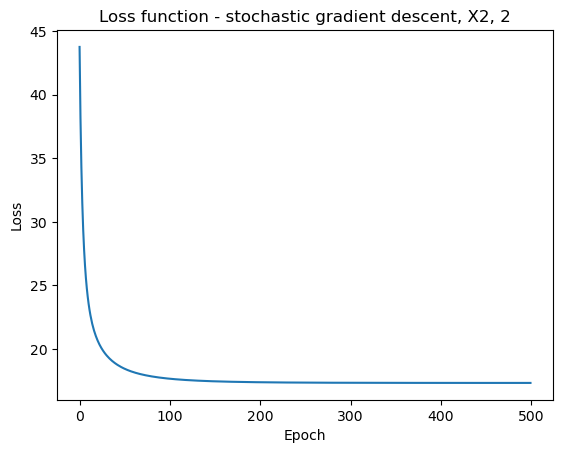

In [651]:
plt.plot(range(len(losses5[2])), losses5[2])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - stochastic gradient descent, X2, 2')

Text(0.5, 1.0, 'Loss function - stochastic gradient descent, X2, 3')

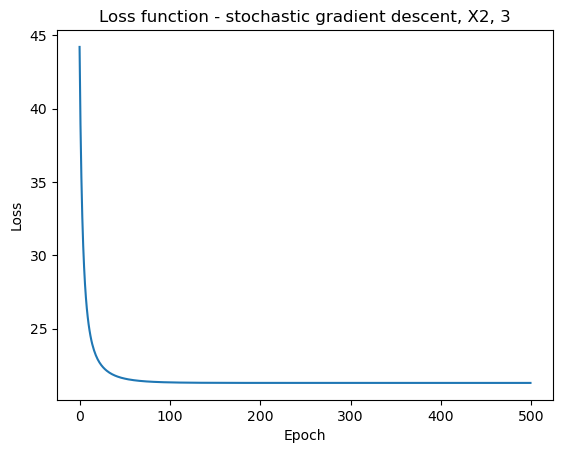

In [652]:
plt.plot(range(len(losses5[3])), losses5[3])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - stochastic gradient descent, X2, 3')

Text(0.5, 1.0, 'Loss function - stochastic gradient descent, X2, 4')

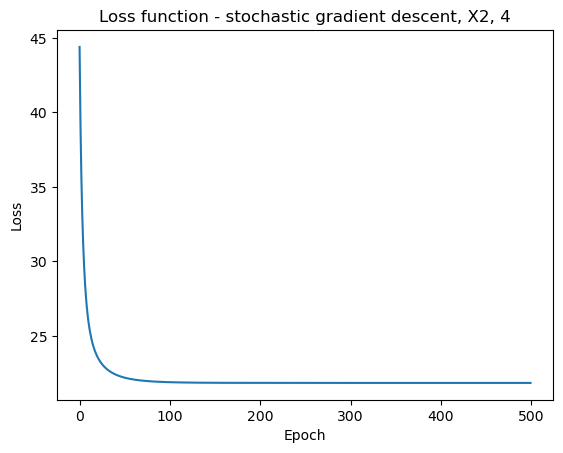

In [653]:
plt.plot(range(len(losses5[4])), losses5[4])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - stochastic gradient descent, X2, 4')

### Stochastic Gradient Descent, X3

In [654]:
# vector of losses for different train-test splits
losses6 = []
# vector of balanced accuracies for different train-test splits
balanced_accuracy6 = []
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.25, random_state=i)
    LR_model = stochastic_gradient_descent()
    LR_model.fit(X_train,y_train)
    losses6.append(LR_model.losses)
    y_pred = LR_model.predict(X_test)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    balanced_accuracy6.append(balanced_accuracy)

In [655]:
balanced_accuracy6

[0.7928571428571429,
 0.8055555555555556,
 0.8012820512820513,
 0.8,
 0.8142361111111112]

In [656]:
meanBA.append(np.round(np.mean(balanced_accuracy6), 4))

Text(0.5, 1.0, 'Loss function - stochastic gradient descent, X3, 0')

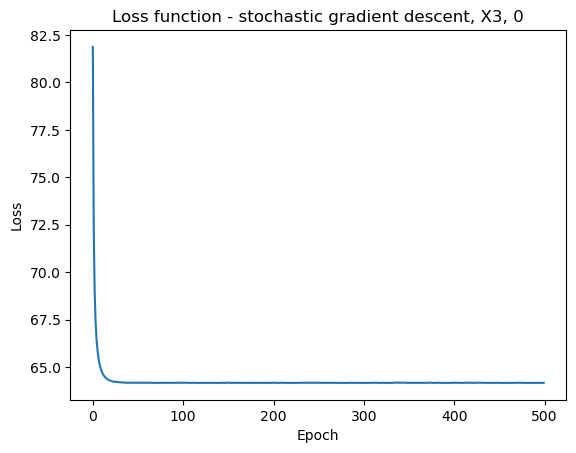

In [657]:
plt.plot(range(len(losses6[0])), losses6[0])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - stochastic gradient descent, X3, 0')

Text(0.5, 1.0, 'Loss function - stochastic gradient descent, X3, 1')

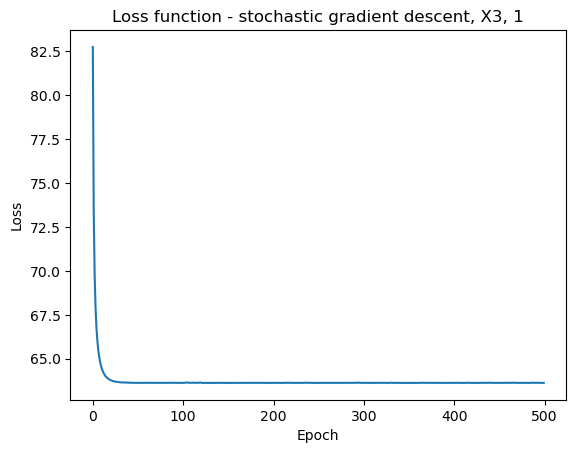

In [658]:
plt.plot(range(len(losses6[1])), losses6[1])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - stochastic gradient descent, X3, 1')

Text(0.5, 1.0, 'Loss function - stochastic gradient descent, X3, 2')

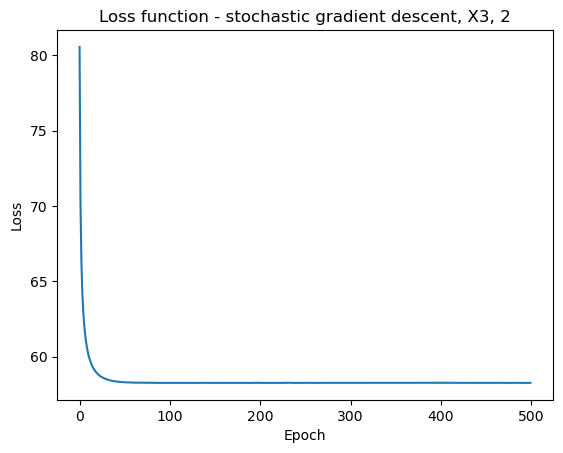

In [659]:
plt.plot(range(len(losses6[2])), losses6[2])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - stochastic gradient descent, X3, 2')

Text(0.5, 1.0, 'Loss function - stochastic gradient descent, X3, 3')

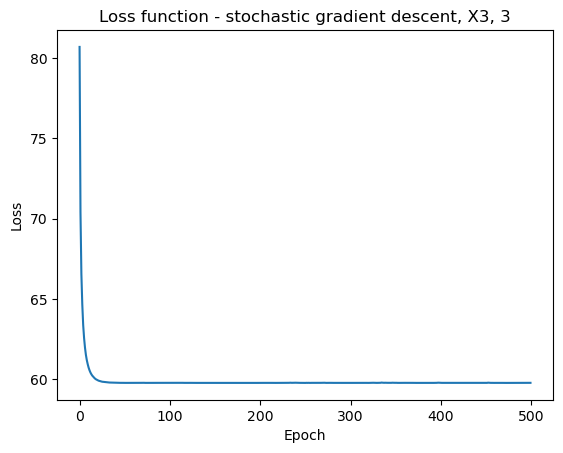

In [660]:
plt.plot(range(len(losses6[3])), losses6[3])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - stochastic gradient descent, X3, 3')

Text(0.5, 1.0, 'Loss function - stochastic gradient descent, X3, 4')

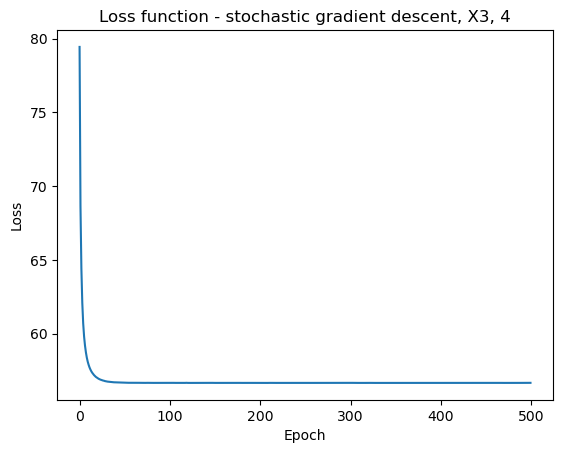

In [661]:
plt.plot(range(len(losses6[4])), losses6[4])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - stochastic gradient descent, X3, 4')

### Stochastic Gradient Descent Minibatch, X1

In [662]:
# vector of losses for different train-test splits
losses7 = []
# vector of balanced accuracies for different train-test splits
balanced_accuracy7 = []
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25, random_state=i)
    LR_model = stochastic_gradient_descent_minibatch()
    LR_model.fit(X_train,y_train)
    losses7.append(LR_model.losses)
    y_pred = LR_model.predict(X_test)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    balanced_accuracy7.append(balanced_accuracy)

In [663]:
balanced_accuracy7

[0.6914751914751914,
 0.6467105263157895,
 0.6349527665317138,
 0.6875804375804375,
 0.667214311792625]

In [664]:
meanBA.append(np.round(np.mean(balanced_accuracy7), 4))

Text(0.5, 1.0, 'Loss function - stochastic gradient descent minibatch, X1, 0')

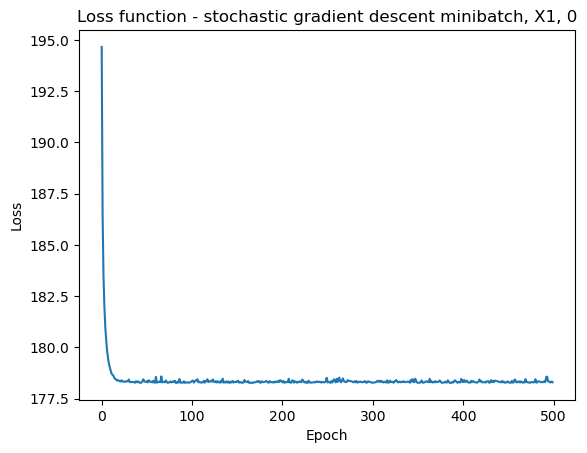

In [665]:
plt.plot(range(len(losses7[0])), losses7[0])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - stochastic gradient descent minibatch, X1, 0')

Text(0.5, 1.0, 'Loss function - stochastic gradient descent minibatch, X1, 1')

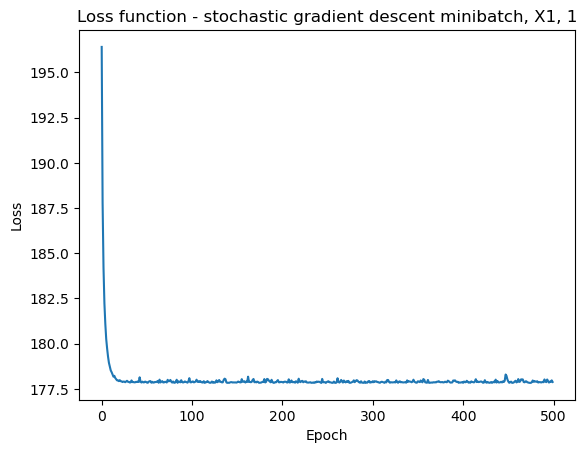

In [666]:
plt.plot(range(len(losses7[1])), losses7[1])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - stochastic gradient descent minibatch, X1, 1')

Text(0.5, 1.0, 'Loss function - stochastic gradient descent minibatch, X1, 2')

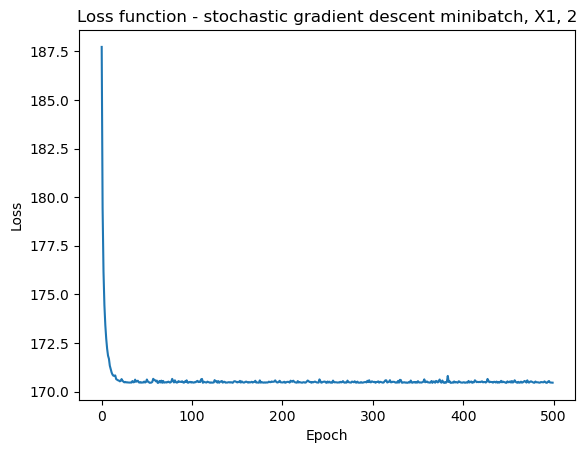

In [667]:
plt.plot(range(len(losses7[2])), losses7[2])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - stochastic gradient descent minibatch, X1, 2')

Text(0.5, 1.0, 'Loss function - stochastic gradient descent minibatch, X1, 3')

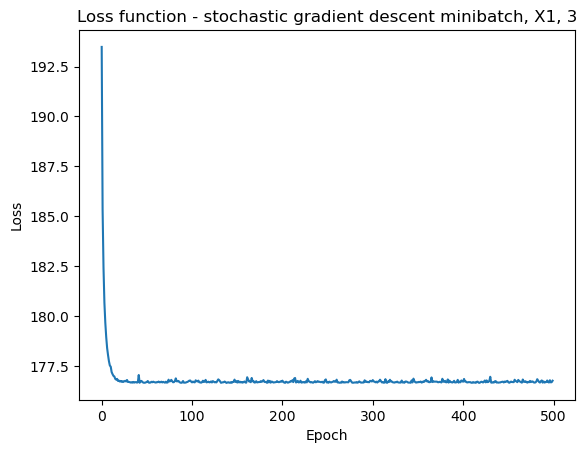

In [668]:
plt.plot(range(len(losses7[3])), losses7[3])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - stochastic gradient descent minibatch, X1, 3')

Text(0.5, 1.0, 'Loss function - stochastic gradient descent minibatch, X1, 4')

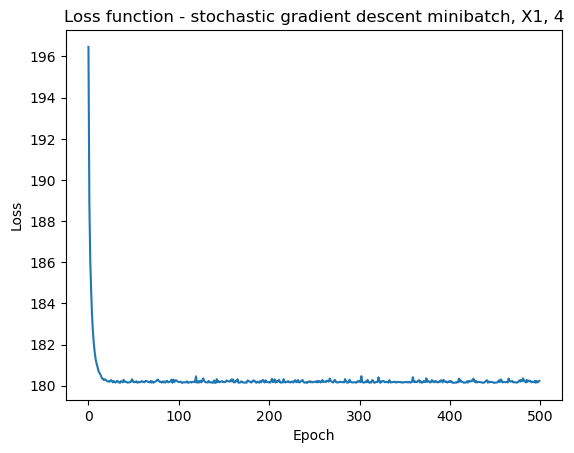

In [669]:
plt.plot(range(len(losses7[4])), losses7[4])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - stochastic gradient descent minibatch, X1, 4')

### Stochastic Gradient Descent Minibatch, X2

In [670]:
# vector of losses for different train-test splits
losses8 = []
# vector of balanced accuracies for different train-test splits
balanced_accuracy8 = []
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.25, random_state=i)
    LR_model = stochastic_gradient_descent_minibatch()
    LR_model.fit(X_train,y_train)
    losses8.append(LR_model.losses)
    y_pred = LR_model.predict(X_test)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    balanced_accuracy8.append(balanced_accuracy)

In [671]:
balanced_accuracy8

[0.5, 0.5, 0.7023809523809523, 0.5, 0.4772727272727273]

In [672]:
meanBA.append(np.round(np.mean(balanced_accuracy8), 4))

Text(0.5, 1.0, 'Loss function - stochastic gradient descent minibatch, X2, 0')

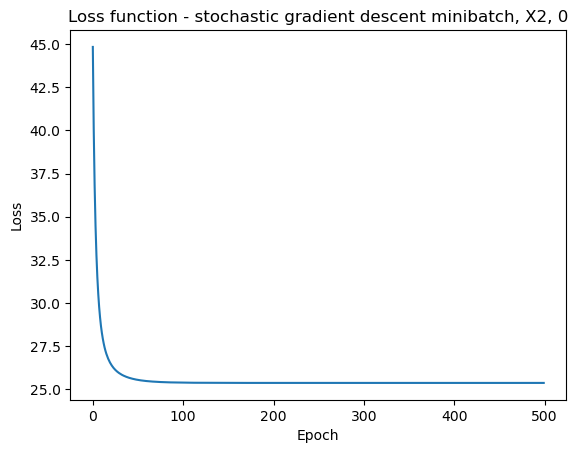

In [673]:
plt.plot(range(len(losses8[0])), losses8[0])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - stochastic gradient descent minibatch, X2, 0')

Text(0.5, 1.0, 'Loss function - stochastic gradient descent minibatch, X2, 1')

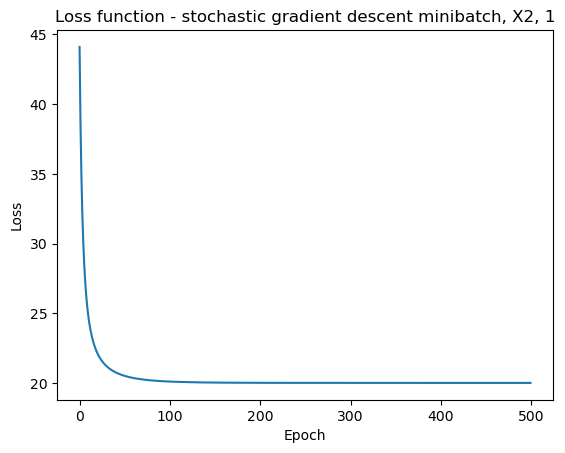

In [674]:
plt.plot(range(len(losses8[1])), losses8[1])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - stochastic gradient descent minibatch, X2, 1')

Text(0.5, 1.0, 'Loss function - stochastic gradient descent minibatch, X2, 2')

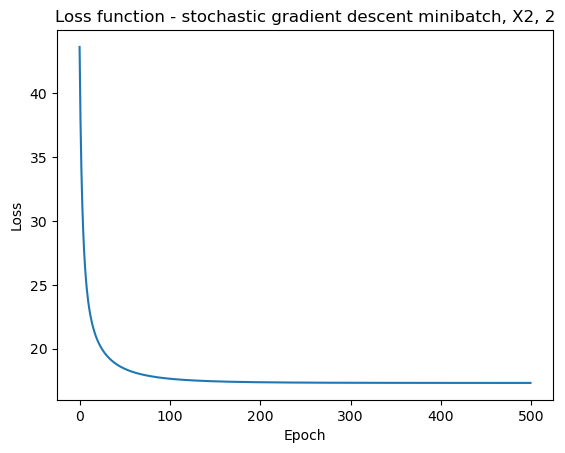

In [675]:
plt.plot(range(len(losses8[2])), losses8[2])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - stochastic gradient descent minibatch, X2, 2')

Text(0.5, 1.0, 'Loss function - stochastic gradient descent minibatch, X2, 3')

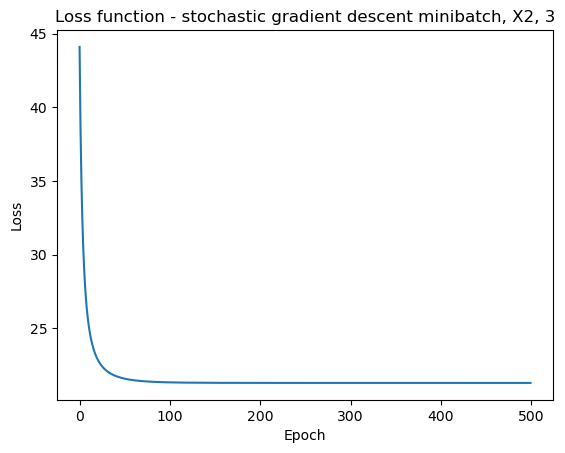

In [676]:
plt.plot(range(len(losses8[3])), losses8[3])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - stochastic gradient descent minibatch, X2, 3')

Text(0.5, 1.0, 'Loss function - stochastic gradient descent minibatch, X2, 4')

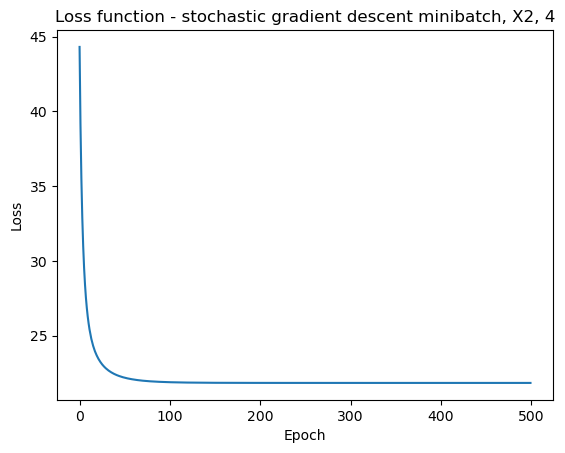

In [677]:
plt.plot(range(len(losses8[4])), losses8[4])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - stochastic gradient descent minibatch, X2, 4')

### Stochastic Gradient Descent Minibatch, X3

In [678]:
# vector of losses for different train-test splits
losses9 = []
# vector of balanced accuracies for different train-test splits
balanced_accuracy9 = []
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.25, random_state=i)
    LR_model = stochastic_gradient_descent_minibatch()
    LR_model.fit(X_train,y_train)
    losses9.append(LR_model.losses)
    y_pred = LR_model.predict(X_test)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    balanced_accuracy9.append(balanced_accuracy)

In [679]:
balanced_accuracy9

[0.7928571428571429,
 0.8055555555555556,
 0.8012820512820513,
 0.8,
 0.8142361111111112]

In [680]:
meanBA.append(np.round(np.mean(balanced_accuracy9), 4))

Text(0.5, 1.0, 'Loss function - stochastic gradient descent minibatch, X3, 0')

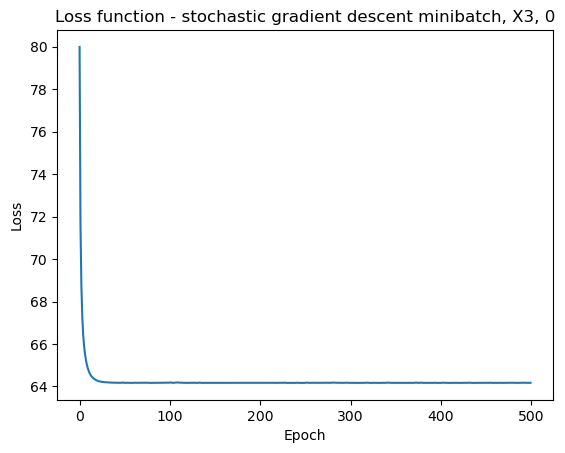

In [681]:
plt.plot(range(len(losses9[0])), losses9[0])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - stochastic gradient descent minibatch, X3, 0')

Text(0.5, 1.0, 'Loss function - stochastic gradient descent minibatch, X3, 1')

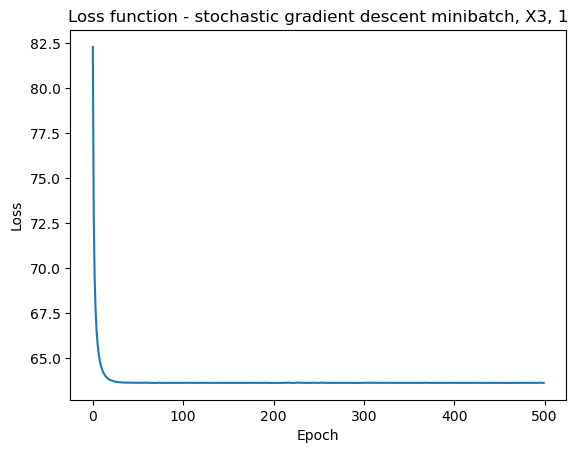

In [682]:
plt.plot(range(len(losses9[1])), losses9[1])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - stochastic gradient descent minibatch, X3, 1')

Text(0.5, 1.0, 'Loss function - stochastic gradient descent minibatch, X3, 2')

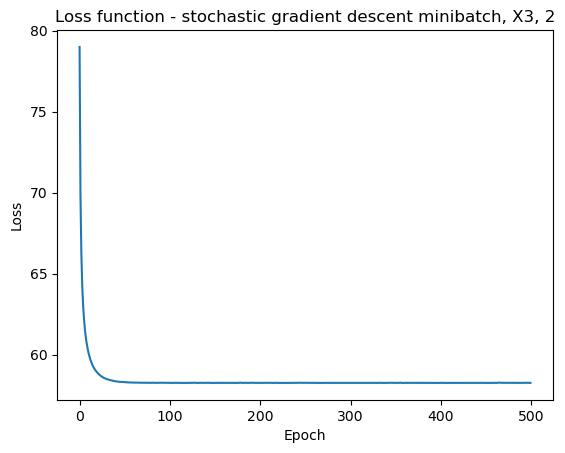

In [683]:
plt.plot(range(len(losses9[2])), losses9[2])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - stochastic gradient descent minibatch, X3, 2')

Text(0.5, 1.0, 'Loss function - stochastic gradient descent minibatch, X3, 3')

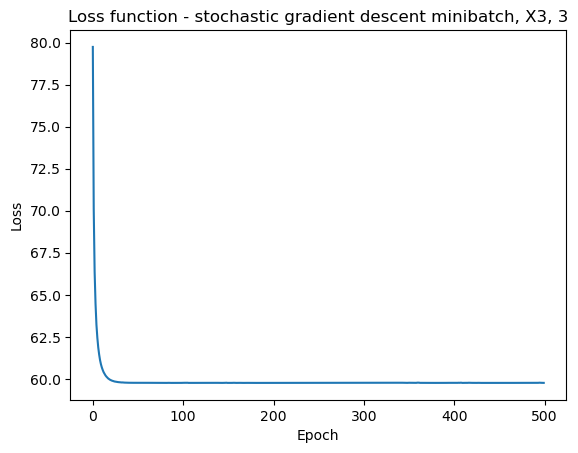

In [684]:
plt.plot(range(len(losses9[3])), losses9[3])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - stochastic gradient descent minibatch, X3, 3')

Text(0.5, 1.0, 'Loss function - stochastic gradient descent minibatch, X3, 4')

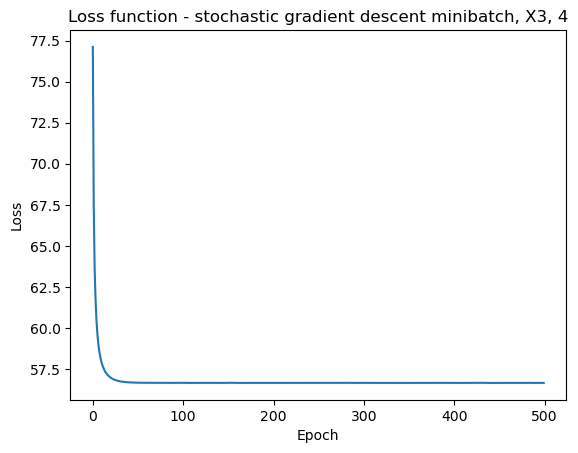

In [685]:
plt.plot(range(len(losses9[4])), losses9[4])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - stochastic gradient descent minibatch, X3, 4')

### Iterative Reweighted Least Squares, X1

In [686]:
# vector of losses for different train-test splits
losses10 = []
# vector of balanced accuracies for different train-test splits
balanced_accuracy10 = []
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25, random_state=i)
    LR_model = iterative_reweighted_least_squares()
    LR_model.fit(X_train,y_train)
    losses10.append(LR_model.losses)
    y_pred = LR_model.predict(X_test)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    balanced_accuracy10.append(balanced_accuracy)

In [687]:
balanced_accuracy10

[0.6914751914751914,
 0.6532894736842105,
 0.6349527665317138,
 0.7010939510939511,
 0.6551661190215408]

In [688]:
meanBA.append(np.round(np.mean(balanced_accuracy10), 4))

Text(0.5, 1.0, 'Loss function - iterative reweighted least squares, X1, 0')

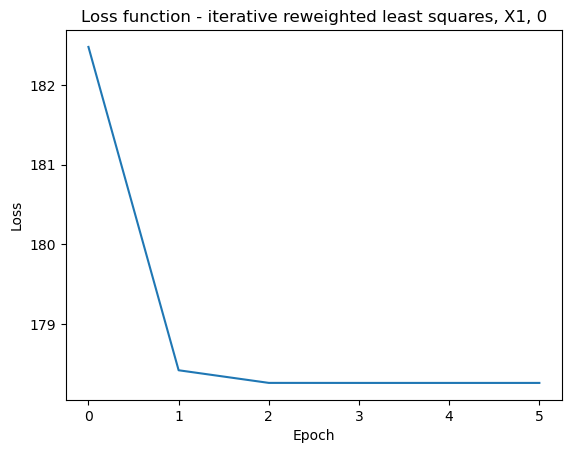

In [689]:
plt.plot(range(len(losses10[0])), losses10[0])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - iterative reweighted least squares, X1, 0')

Text(0.5, 1.0, 'Loss function - iterative reweighted least squares, X1, 1')

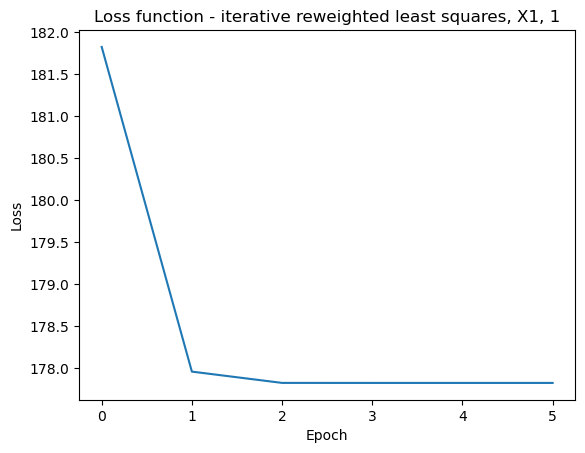

In [690]:
plt.plot(range(len(losses10[1])), losses10[1])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - iterative reweighted least squares, X1, 1')

Text(0.5, 1.0, 'Loss function - iterative reweighted least squares, X1, 2')

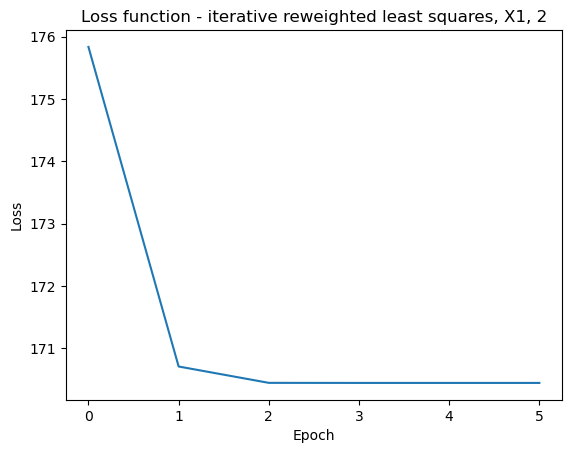

In [691]:
plt.plot(range(len(losses10[2])), losses10[2])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - iterative reweighted least squares, X1, 2')

Text(0.5, 1.0, 'Loss function - iterative reweighted least squares, X1, 3')

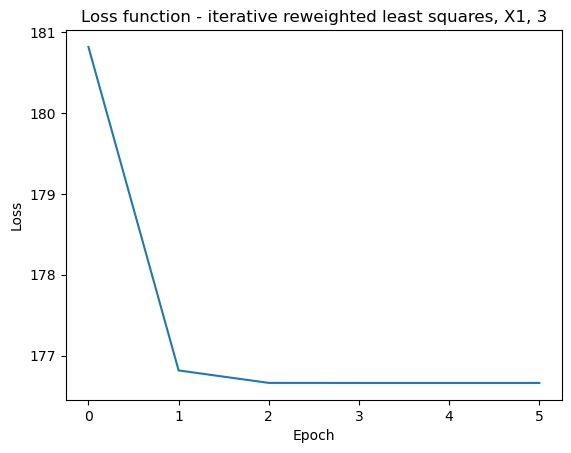

In [692]:
plt.plot(range(len(losses10[3])), losses10[3])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - iterative reweighted least squares, X1, 3')

Text(0.5, 1.0, 'Loss function - iterative reweighted least squares, X1, 4')

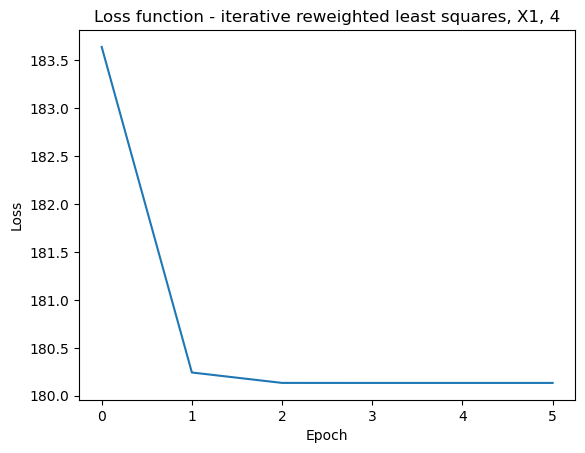

In [693]:
plt.plot(range(len(losses10[4])), losses10[4])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - iterative reweighted least squares, X1, 4')

### Iterative Reweighted Least Squares, X2

In [694]:
# vector of losses for different train-test splits
losses11 = []
# vector of balanced accuracies for different train-test splits
balanced_accuracy11 = []
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.25, random_state=i)
    LR_model = iterative_reweighted_least_squares()
    LR_model.fit(X_train,y_train)
    losses11.append(LR_model.losses)
    y_pred = LR_model.predict(X_test)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    balanced_accuracy11.append(balanced_accuracy)

In [695]:
balanced_accuracy11

[0.5, 0.5, 0.7023809523809523, 0.5, 0.4772727272727273]

In [696]:
meanBA.append(np.round(np.mean(balanced_accuracy11), 4))

Text(0.5, 1.0, 'Loss function - iterative reweighted least squares, X2, 0')

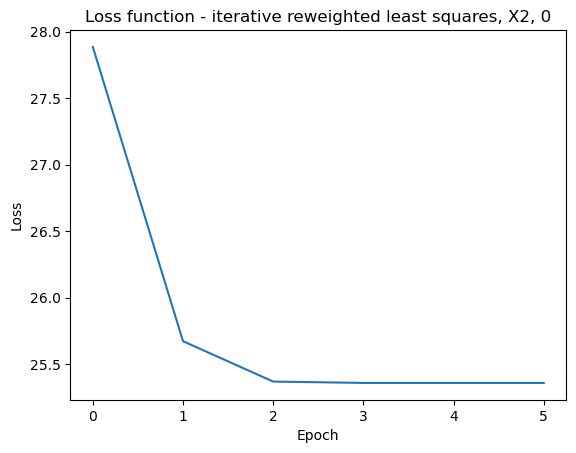

In [697]:
plt.plot(range(len(losses11[0])), losses11[0])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - iterative reweighted least squares, X2, 0')

Text(0.5, 1.0, 'Loss function - iterative reweighted least squares, X2, 1')

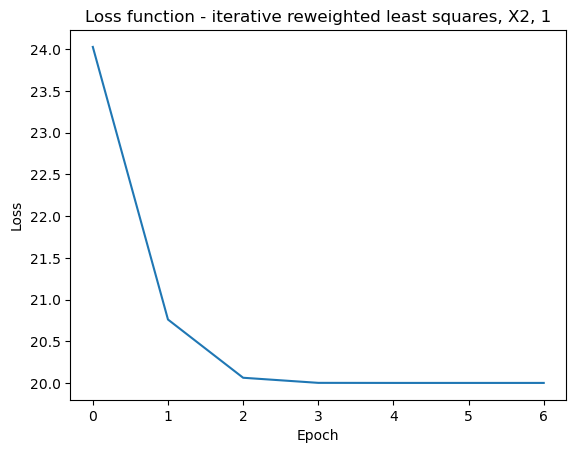

In [698]:
plt.plot(range(len(losses11[1])), losses11[1])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - iterative reweighted least squares, X2, 1')

Text(0.5, 1.0, 'Loss function - iterative reweighted least squares, X2, 2')

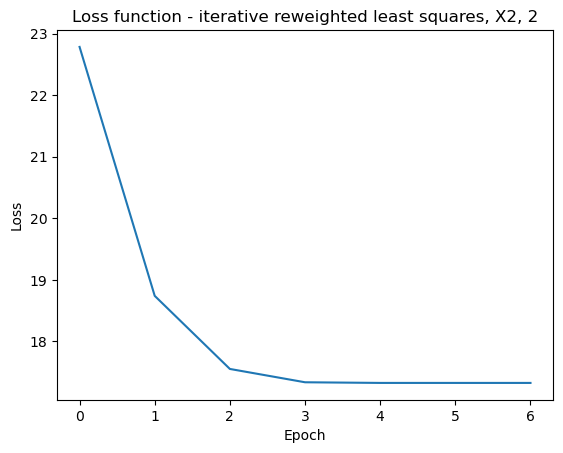

In [699]:
plt.plot(range(len(losses11[2])), losses11[2])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - iterative reweighted least squares, X2, 2')

Text(0.5, 1.0, 'Loss function - iterative reweighted least squares, X2, 3')

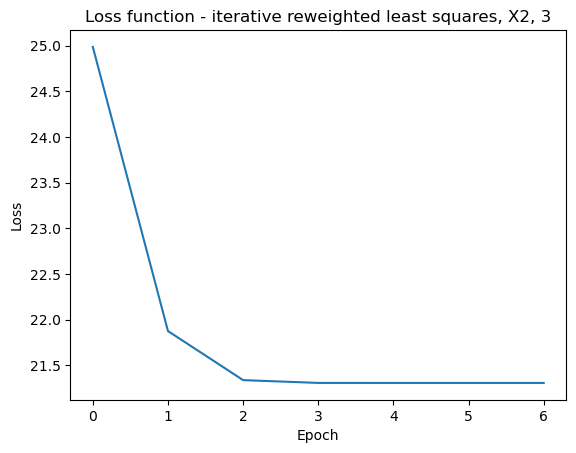

In [700]:
plt.plot(range(len(losses11[3])), losses11[3])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - iterative reweighted least squares, X2, 3')

Text(0.5, 1.0, 'Loss function - iterative reweighted least squares, X2, 4')

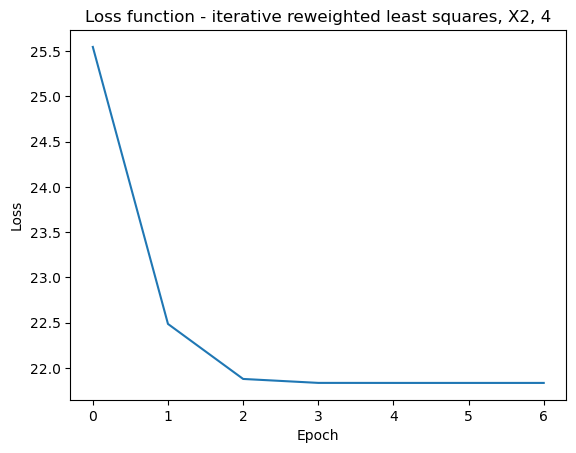

In [701]:
plt.plot(range(len(losses11[4])), losses11[4])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - iterative reweighted least squares, X2, 4')

### Iterative Reweighted Least Squares, X3

In [702]:
# vector of losses for different train-test splits
losses12 = []
# vector of balanced accuracies for different train-test splits
balanced_accuracy12 = []
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.25, random_state=i)
    LR_model = iterative_reweighted_least_squares()
    LR_model.fit(X_train,y_train)
    losses12.append(LR_model.losses)
    y_pred = LR_model.predict(X_test)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    balanced_accuracy12.append(balanced_accuracy)

In [703]:
balanced_accuracy12

[0.7803571428571429,
 0.8055555555555556,
 0.8012820512820513,
 0.8,
 0.8142361111111112]

In [704]:
meanBA.append(np.round(np.mean(balanced_accuracy12), 4))

Text(0.5, 1.0, 'Loss function - iterative reweighted least squares, X3, 0')

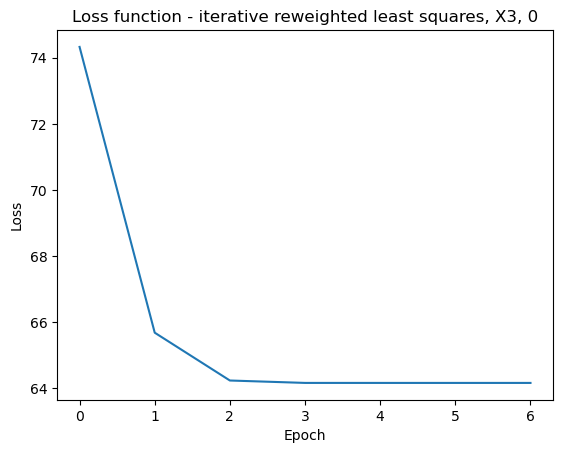

In [705]:
plt.plot(range(len(losses12[0])), losses12[0])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - iterative reweighted least squares, X3, 0')

Text(0.5, 1.0, 'Loss function - iterative reweighted least squares, X3, 1')

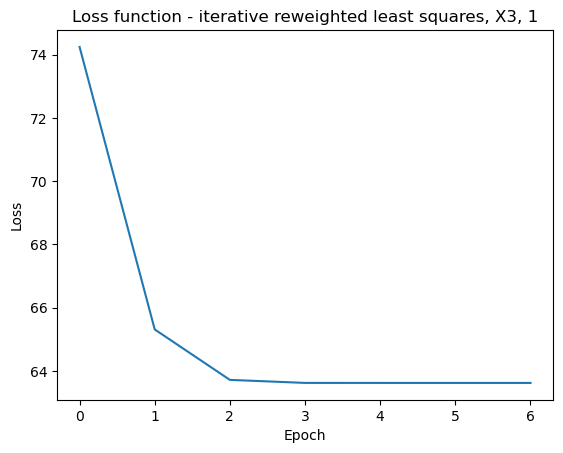

In [706]:
plt.plot(range(len(losses12[1])), losses12[1])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - iterative reweighted least squares, X3, 1')

Text(0.5, 1.0, 'Loss function - iterative reweighted least squares, X3, 2')

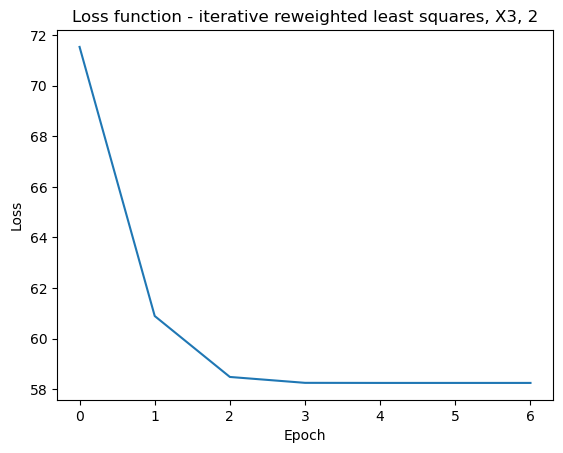

In [707]:
plt.plot(range(len(losses12[2])), losses12[2])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - iterative reweighted least squares, X3, 2')

Text(0.5, 1.0, 'Loss function - iterative reweighted least squares, X3, 3')

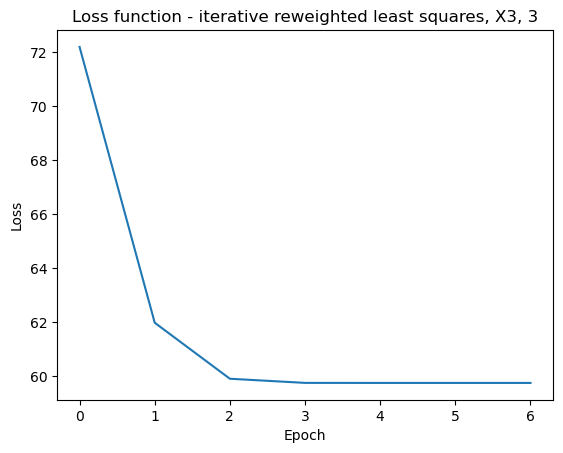

In [708]:
plt.plot(range(len(losses12[3])), losses12[3])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - iterative reweighted least squares, X3, 3')

Text(0.5, 1.0, 'Loss function - iterative reweighted least squares, X3, 4')

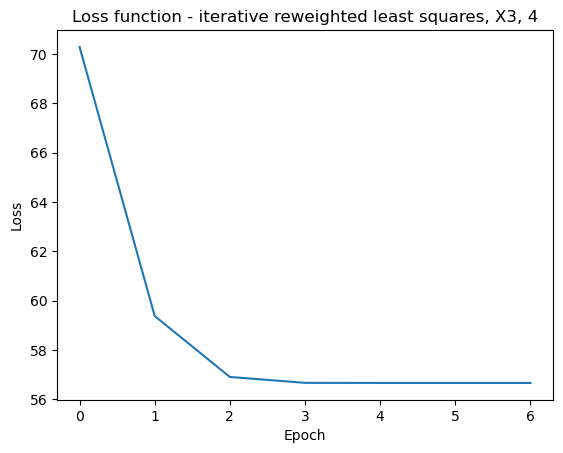

In [709]:
plt.plot(range(len(losses12[4])), losses12[4])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss function - iterative reweighted least squares, X3, 4')

### Mean balanced accuracy plot

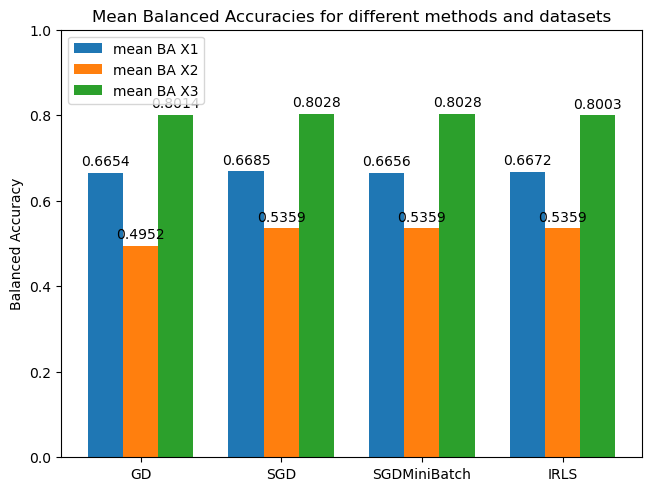

In [710]:
methods = ['GD', 'SGD', 'SGDMiniBatch', 'IRLS']
meanBA1 = list(meanBA[i] for i in [0, 3, 6, 9])
meanBA2 = list(meanBA[i] for i in [1, 4, 7, 10])
meanBA3 = list(meanBA[i] for i in [2, 5, 8, 11])
means = {
    'mean BA X1': meanBA1, 
    'mean BA X2': meanBA2,
    'mean BA X3': meanBA3
}

x = np.arange(len(methods))
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Balanced Accuracy')
ax.set_title('Mean Balanced Accuracies for different methods and datasets')
ax.set_xticks(x + width, methods)
ax.legend(loc='upper left')
ax.set_ylim(0, 1)

plt.show()